## Sentiment Analysis of Amazon kindle store reviews using NLTK

The dataset I have used comes from Kaggle. It is a subset of dataset of product reviews from Amazon Kindle Store category from May 1996 to July 2014. Dataset Link: https://www.kaggle.com/bharadwaj6/kindle-reviews

### Libraries needed for the analysis

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
#Libraries needed for building word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Loading data into a dataframe

In [2]:
df = pd.read_csv("G:\edx_courses\python_for_data_science\week_9_final_project\kindle_reviews.csv\kindle_reviews.csv",sep=",")

In [3]:
df.shape

(982619, 10)

### Cleaning and Exploring the data

In [4]:
#checking for missing values
df.isnull().any()

Unnamed: 0        False
asin              False
helpful           False
overall           False
reviewText         True
reviewTime        False
reviewerID        False
reviewerName       True
summary            True
unixReviewTime    False
dtype: bool

In [5]:
df.columns  

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0         int64
asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

In [7]:
rows_before = df.shape[0]

In [8]:
#dropping all the null values
df = df.dropna()

In [9]:
rows_after=df.shape[0]

In [10]:
#the no. of rows dropped
rows_before-rows_after

3839

In [11]:
#cross validating for any null values
df.isnull().any()

Unnamed: 0        False
asin              False
helpful           False
overall           False
reviewText        False
reviewTime        False
reviewerID        False
reviewerName      False
summary           False
unixReviewTime    False
dtype: bool

In [12]:
df_copy = df.copy()

In [13]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [14]:
df.head(3)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600


In [15]:
#creating a new column 'year' from the existing column 'reviewTime' for plotting purpose
df['year'] =df['reviewTime'].str.extract(".*\,\s(.*)",expand=True)

In [16]:
del df['Unnamed: 0']
del df['unixReviewTime']

In [17]:
#value count of ratings
rating_counts = df[['overall','reviewText']].groupby('overall').count()
rating_counts

,reviewText
overall,
1,22814
2,33932
3,95728
4,253082
5,573224


In [18]:
#creating a df for plotting the overall scores vs year
review_year_df = df[['reviewText','year']].groupby('year',as_index=False).count()

In [19]:
review_year_df

,year,reviewText
0,2000,8
1,2001,2
2,2002,1
3,2003,4
4,2004,10
5,2005,18
6,2006,23
7,2007,39
8,2008,191
9,2009,510


In [20]:
%matplotlib inline

#function for plotting
def plot_bar(d):
    years=d['year'].values
    reviews = d['reviewText'].values
    plt.plot(years,reviews,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=9)
    plt.ylabel('no. of reviews')
    plt.xticks(years,rotation='vertical')
    plt.title('Number of reviews over year')
    plt.show()

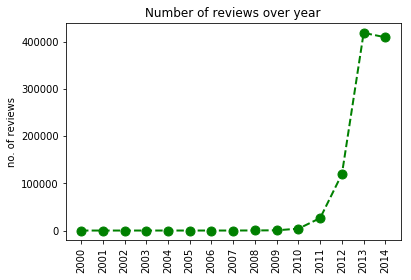

In [21]:
plot_bar(review_year_df)

No.of reviews vs. Review categories


In [23]:
review_category_df = df[['reviewText','overall']].groupby('overall',as_index=False).count()

In [24]:
review_category_df

,overall,reviewText
0,1,22814
1,2,33932
2,3,95728
3,4,253082
4,5,573224


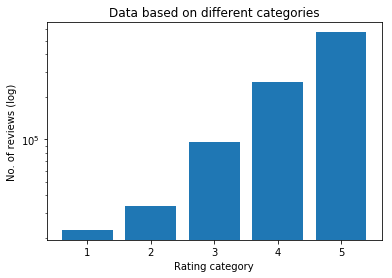

In [25]:
plt.bar(review_category_df['overall'],review_category_df['reviewText'],log=1)
plt.xlabel("Rating category")
plt.ylabel("No. of reviews (log)")
plt.title("Data based on different categories")
plt.show()

### creating filters to get the positive and negative reviews

Rating system for Amazon.com

Based on the research paper by Fang X*, and Zhan J from the Journal of Big Data "Sentiment analysis using product review data." I have included the rating system for Amazon reviews.

    Ratings    Comments

    1 star     I hate it.

    2 star     I don't like it.

    3 star     It's okay.

    4 star     I like it.

    5 star     I love it.

In [26]:
df.shape

(978780, 9)

In [27]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'year'],
      dtype='object')

In [28]:
#positive reviews
#those reviews with overall rating 4 & 5 are considered positive
positive_filter = df['overall'] > 3
positive_reviews = df[positive_filter]

In [29]:
positive_reviews.shape

(826306, 9)

In [30]:
#negative reviews
#reviews with overall rating 1 & 2 are considered negative
negative_filter = df['overall'] <3
negative_reviews = df[negative_filter]

In [31]:
negative_reviews.shape

(56746, 9)

In [32]:
#positive_review_list = positive_reviews['reviewText'][:2000]
#negative_review_list = negative_reviews['reviewText'][:2000]
positive_review_list = positive_reviews.sample(n=2000)
negative_review_list = negative_reviews.sample(n=2000)

In [37]:
positive_review_list.head(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,year
243649,B008AMCR6U,"[0, 0]",5,This book truly caps off the BeSwitched Series...,"12 3, 2013",A3G1AI4K00I24Z,Heaven G.,GREAT READ!,2013
447523,B00BN0T8ZO,"[0, 0]",5,S*** is abt to gt real. This book good as he'l...,"05 29, 2014",AEWTM9BHEHDIC,Asia Kelley,Damn,2014
753148,B00H8BEZS2,"[3, 3]",5,This book is absolutely amazing and one I will...,"03 17, 2014",AWP0UKN7P53QT,Djits,Wow.,2014
633542,B00EW7DHBG,"[1, 1]",5,I just finished this book and I loved it. The...,"09 13, 2013",A31BDZZG803M93,Kelly Neely,Loved it but needed some serious editing.,2013
393418,B00ATQT3PS,"[0, 0]",5,"This a great story, I kind of can't wait for t...","07 22, 2013",AFTMVK7R7JCKW,Claudia Hernandez,Amazing!,2013
664929,B00FGHYLD4,"[0, 0]",4,This was a delightful play on Cinderella. This...,"10 21, 2013",A24OB0Y1OJ3A03,Love to read witty and clean,Charming :),2013
620122,B00EMNJUD4,"[0, 0]",4,"I truly enjoyed this book, and can&#8217;t wai...","07 14, 2014",AYZYK3JD0O3CU,"Marilynn Solis ""Caitysmom""",Very entertaining,2014
215425,B007WNBYXA,"[1, 1]",5,Very practical. A fast read with striking word...,"04 25, 2012",AXL3BVNLSGN6K,KevinC,This Book Makes Sense,2012
437392,B00BHIBLOS,"[0, 0]",5,This book gives new meaning to teachers pet!! ...,"07 28, 2013",A38VHK9477G84L,LMR,Sizzling Hot,2013
174740,B0074ZTD4S,"[0, 0]",5,This book was so good!! Brandon is the man!! ...,"04 12, 2013",APZG1T1DHH1CX,"JuicyMo ""%Queen~Bee%""",GOOD!!!,2013


In [39]:
negative_review_list.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,year
812574,B00I6HQWT2,"[1, 1]",2,"This was an extremely short story, so I wasn't...","02 21, 2014",A1BUPA617VIGSM,Rebecca Waters,I don't get it?,2014
952678,B00KSB7MIY,"[3, 4]",2,"Ok, let's see:-Basic premise has been used bef...","07 6, 2014",A1YI8ILV6V4YVH,Tessa,Didn't even use spellchecker!,2014
691645,B00G19AZTK,"[2, 15]",1,"Book was ok,it took me a long time to finish,a...","01 26, 2014",ALTC2XJE67A7Z,Marie,Review,2014
793379,B00HVQIKBC,"[3, 3]",1,"I'd been warned, but I like to make my own dec...","02 18, 2014",ASQIFMZ216FU9,Deirdre,Pregnant Male Shifter,2014
266135,B008NVJJDW,"[8, 8]",1,Im so pissed that I purchased this book and it...,"10 2, 2012",AHKSL6DUHMD7R,What happened?,Pissed Off,2012


In [42]:
len(positive_review_list['asin'].unique().tolist())

1931

In [45]:
len(df['asin'].unique().tolist())

61932

In [44]:
positive_review_list.index

Int64Index([243649, 447523, 753148, 633542, 393418, 664929, 620122, 215425,
            437392, 174740,
            ...
            178740,   5841, 403392, 448745,  24132, 487071,  78221, 161693,
            814515, 519969],
           dtype='int64', length=2000)

### Word Tokenization

Tokenizing words for the reviews
Using word_tokenizer trained on English from NLTK's punkt

In [33]:
positive_review_tokenized = [nltk.word_tokenize(word) for word in positive_review_list]
negative_review_tokenized = [nltk.word_tokenize(word) for word in negative_review_list]

In [34]:
positive_review_tokenized[3]

['I',
 "'d",
 'never',
 'read',
 'any',
 'of',
 'the',
 'Amy',
 'Brewster',
 'mysteries',
 'until',
 'this',
 'one..',
 'So',
 'I',
 'am',
 'really',
 'hooked',
 'on',
 'them',
 'now',
 '.']

### Removing stopwords and punctuations

We need to remove stopwords and punctuations from our words list for further analysis. This can be acheived by using stopwords corpus from nltk for English. We can get the punctuations from string class.

In [35]:
#here is the line of code for useless words list
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

In [36]:
#function for removing uselesswords
def remove_uselesswords(words):
    return [word for word in words if not word.lower() in useless_words]

For the lists we have created using tokenized words(positive_review_tokenized, negative_review_tokenized), we need to remove all the useless words. We achieve it in the following step:

In [37]:
#positive_words_filtered = [remove_uselesswords(w) for w in positive_review_tokenized]
#negative_words_filtered = [remove_uselesswords(w) for w in negative_review_tokenized]
positive_words_filtered = []
negative_words_filtered = []

for w in positive_review_tokenized:
    positive_words_filtered.append(remove_uselesswords(w))

for w in negative_review_tokenized:
    negative_words_filtered.append(remove_uselesswords(w))


checking the number of words before and after applying remove_uselesswords function. Shown below is the number of words of first item from positive_review_tokenized list, before the filtering criteria.

In [38]:
len(positive_review_tokenized[0])

57

In [39]:
#number of words after filtering
len(positive_words_filtered[0])

29

we see that the number of words after filtering for the first item in positive list has been reduced from 57 to 29. Similarly we see a reduction in the number of words for the first item negative review list.

In [40]:
len(negative_review_tokenized[0])

342

In [41]:
len(negative_words_filtered[0])

185

### cleaning digits from our words list

In [42]:
#defining function for removing digits from our words list
def remove_digits(words):
    return [word for word in words if not word.isdigit()]

In [43]:
positive_words_digits_filtered = []
negative_words_digits_filtered = []

for w in positive_words_filtered:
    positive_words_digits_filtered.append(remove_digits(w))

for w in negative_words_filtered:
    negative_words_digits_filtered.append(remove_digits(w))

In [44]:
len(positive_words_filtered[5])

19

In [45]:
len(positive_words_digits_filtered[5])

17

We see that the digits in the following list item has been removed after filtering for digits

In [46]:
#before filtering for digits
positive_words_filtered[5]

['beautiful',
 'in-depth',
 'character',
 'description',
 'makes',
 'like',
 'fast',
 'pacing',
 'movie',
 'pity',
 'Mr',
 'Merwin',
 'write',
 '30',
 'instead',
 '3',
 'Amy',
 'Brewster',
 'mysteries']

In [47]:
#after filtering for digits
positive_words_digits_filtered[5]

['beautiful',
 'in-depth',
 'character',
 'description',
 'makes',
 'like',
 'fast',
 'pacing',
 'movie',
 'pity',
 'Mr',
 'Merwin',
 'write',
 'instead',
 'Amy',
 'Brewster',
 'mysteries']

### Text cleaning

In the subsequent step, the unnecessary characters or incomplete characters are cleaned. For eg: 's, some symbols etc are replaced with comma, replacing contracted words like n't to not (note that I have not handled for all contracted words. Only few of them.)
The function clean_words_for_incomplete_characters will help us achieve this.

In [48]:
incomplete_characters = {"'s":",", "--":",", "n't":"not", "``":",", "...":",","''":",", "'ll":"will","'ve":"have","'m":",","'d":","}

In [49]:
def clean_words_for_incomplete_characters(words_list):
    all_words_filtered = []
    for word in words_list:
        if word.lower() in incomplete_characters:
            word = incomplete_characters[word.lower()]
            all_words_filtered.append(word)
            #return word
        else:
            all_words_filtered.append(word)
            #return word
    return all_words_filtered

In [50]:
#cleaning word list further for incomplete characters
positive_text_cleaned = [clean_words_for_incomplete_characters(word) for word in positive_words_digits_filtered]
negative_text_cleaned = [clean_words_for_incomplete_characters(word) for word in negative_words_digits_filtered]

In [51]:
#the above steps results' are illustrated in the following sample output:
positive_words_digits_filtered[91]

['able',
 'get',
 'book',
 'several',
 'years',
 'ago',
 'free',
 'Kindle',
 "'m",
 'getting',
 '``',
 'read',
 "''",
 'list',
 "'m",
 'quite',
 'sure',
 "n't",
 'recognize',
 'got',
 'Amazon',
 'anymore',
 'usually',
 'top',
 'product',
 'page',
 'wish',
 'book',
 'longer',
 'real',
 'problem',
 'even',
 'short',
 'would',
 'preferred',
 'chapter',
 'demarcations',
 'would',
 'make',
 'much',
 'easier',
 'find',
 'stopping',
 'place',
 'see',
 'close',
 'end',
 'chapter',
 'need/want',
 "'s",
 'much',
 'big',
 'problem',
 'book',
 'short',
 "'re",
 'reading',
 'novella',
 "'s",
 'still',
 'nice',
 'really',
 'felt',
 'characters',
 'book',
 'seem',
 'mostly',
 'real',
 'bit',
 'irrationality',
 'mixed',
 "n't",
 'think',
 'would',
 'completely',
 'way',
 'real',
 'life',
 'wo',
 "n't",
 'bore',
 'plot',
 'summary',
 'know',
 'reviewers',
 'fond',
 'like',
 'light',
 'adventure',
 'stories',
 'smattering',
 'intrigue',
 'suspense',
 'think',
 "'ll",
 'enjoy',
 'story',
 'especially',
 

During text cleaning process, some characters and symbols where replaced with comma (check previous step). Hence in the next step we are removing the comma's from our word list.

In [52]:
#function for removing comma's
def remove_comma(word_list):
    final_list=[]
    comma = [',']
    for w in word_list:
        if not w in comma:
            final_list.append(w)         
    
    return final_list

In [53]:
final_positive_word_list = [remove_comma(w) for w in positive_text_cleaned]
final_negative_word_list = [remove_comma(w) for w in negative_text_cleaned]

In [54]:
len(positive_text_cleaned[91])

109

In [55]:
len(final_positive_word_list[91])

103

### Word cloud and most common words

Here a complete list of words from both positive and negative reviews are created in the following step, inorder to build a word cloud image

In [56]:
import itertools
total_words = final_positive_word_list + final_negative_word_list
all_words = list(itertools.chain.from_iterable(total_words))

In [57]:
len(all_words)

206903

In [58]:
len(total_words)

4000

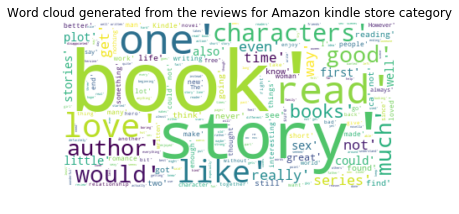

In [59]:
# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(str(all_words))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word cloud generated from the reviews for Amazon kindle store category")
plt.axis("off")
plt.show()

In the word cloud diagram, we see a words which basically implies that the reviews are indeed on books

It would be interesting as well as informative to plot the Frequencies of the word in positive and negative reviews. 

In [60]:
from collections import Counter
word_counter = Counter(all_words)

In [61]:
most_common_words = word_counter.most_common()[:15]

In [62]:
most_common_words

[('book', 3803),
 ('not', 3345),
 ('story', 2797),
 ('read', 2416),
 ('one', 1826),
 ('like', 1542),
 ('would', 1356),
 ('love', 1197),
 ('characters', 1176),
 ('good', 1087),
 ('books', 1058),
 ('really', 1053),
 ('get', 1012),
 ('could', 973),
 ('author', 934)]

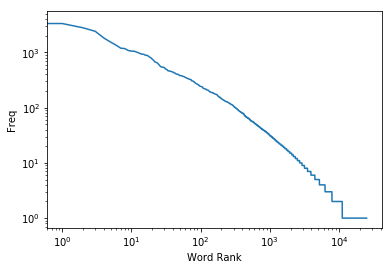

In [63]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

### Building Bag of words Model for Feature Generation

Here we are building a matrix from the words list. We need to build negative features and positive features separately inorder to train and test our classifier model for sentiment analysis.
A separate dictionary of words for both positive and negative reviews is created and we associate with the label 'pos' and 'neg' to it.

In [64]:
#function for creating Bag of words
def build_bag_of_words_features_filtered(words):
    return {word:1 for word in words}

In [65]:
positive_features = [(build_bag_of_words_features_filtered(words),'pos') for words in final_positive_word_list]
negative_features = [(build_bag_of_words_features_filtered(words),'neg') for words in final_negative_word_list]

In [66]:
len(negative_features)

2000

In [67]:
positive_features[3]

({'never': 1,
  'read': 1,
  'Amy': 1,
  'Brewster': 1,
  'mysteries': 1,
  'one..': 1,
  'really': 1,
  'hooked': 1},
 'pos')

### Train a classifier

In [68]:
from nltk.classify import NaiveBayesClassifier

Here I am using 80% of the date in order to train my model. For 2000 reviews 1600 will be 80%.

In [69]:
split=1600

In [70]:
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [71]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[:split]+negative_features[:split])*100

96.125

In [72]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])*100

82.0

In [73]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
                  poorly = 1                 neg : pos    =     27.7 : 1.0
                   Verne = 1                 pos : neg    =     25.0 : 1.0
                 grammar = 1                 neg : pos    =     24.3 : 1.0
                  errors = 1                 neg : pos    =     23.8 : 1.0
           disappointing = 1                 neg : pos    =     23.0 : 1.0
                   Jules = 1                 pos : neg    =     21.7 : 1.0
                sentence = 1                 neg : pos    =     21.7 : 1.0
                Reviewed = 1                 pos : neg    =     17.8 : 1.0
                Joyfully = 1                 pos : neg    =     17.0 : 1.0
                  boring = 1                 neg : pos    =     16.6 : 1.0
